In this notebook we make an example of how to use the EpidemicKabu library. For this, we use the unCoVer data about COVID-19 epidemic in different countries with  daily dates and cases reported between 2020 and 2022. All the data used is in "./data/" directory.

Importing the library

In [2]:
import epidemickabu as ek

In [3]:
# importing other necesary libraries
import pandas as pd
import matplotlib.pyplot as plt

Defining the variables to use

In [5]:
# The dataframe with the columns dates and cases by date
database = pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/data/uncoverCountries.csv")
database = database[["Date_reported","Country_code","Country","New_cases"]]
databaseCOLOMBIA=database[database["Country_code"]=="GB"]
datesName = "Date_reported"
casesName = "New_cases"
databaseCOLOMBIA.head(3)

# The next dataframe has the kernel values for the countries
configFile= pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/configurationFile.csv")
configFile.head(3)

# the names of the output files
plotNameW = "Epidemic_curve_UK_W_exploringL"
dfNameW = "Epidemic_curve_UK_W_exploringL"
plotNamePV = "Epidemic_curve_UK_PV_exploringL"
dfNamePV = "Epidemic_curve_UK_PV_exploringL"

#Be sure to create the "./plots/" and "./dataframes" folder in the same folder in which you
#are running the code, or define the variables to set an specific directory
outFolderPlot= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/plots/"
outFolderDF= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examplesdataframes/"

# The threshols is optional by default is zero. We declarate them but ...
thresholdW = 0
thresholdPV = 0

Waves

In [6]:
# A simplier version with a kernels as a number an without customize the attributes with default values
example = ek.waves(databaseCOLOMBIA,datesName,casesName,30,30,plotNameW,dfNameW)
example.run()


In [7]:
example.__dict__

{'df':       Date_reported Country_code             Country  New_cases  \
 11988    2020-01-03           GB  The United Kingdom          0   
 11989    2020-01-04           GB  The United Kingdom          0   
 11990    2020-01-05           GB  The United Kingdom          0   
 11991    2020-01-06           GB  The United Kingdom          0   
 11992    2020-01-07           GB  The United Kingdom          0   
 ...             ...          ...                 ...        ...   
 12982    2022-09-23           GB  The United Kingdom       4280   
 12983    2022-09-24           GB  The United Kingdom          0   
 12984    2022-09-25           GB  The United Kingdom          0   
 12985    2022-09-26           GB  The United Kingdom          0   
 12986    2022-09-27           GB  The United Kingdom          0   
 
        NormalizedCases  gaussian  SmoothedNCases  SmoothedCases  \
 11988         0.000000  0.000000    4.495196e-07       0.123909   
 11989         0.000000  0.000000    4.9

In [8]:
example.df

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW
11988,2020-01-03,GB,The United Kingdom,0,0.000000,0.000000,4.495196e-07,0.123909,NaN,7.693214e-07,NaN,False,0
11989,2020-01-04,GB,The United Kingdom,0,0.000000,0.000000,4.998042e-07,0.137770,5.028466e-08,8.487886e-07,7.946720e-08,0.0,0
11990,2020-01-05,GB,The United Kingdom,0,0.000000,0.000000,5.555402e-07,0.153133,5.573603e-08,9.379797e-07,8.919110e-08,0.0,0
11991,2020-01-06,GB,The United Kingdom,0,0.000000,0.000000,6.173653e-07,0.170175,6.182509e-08,1.038115e-06,1.001357e-07,0.0,0
11992,2020-01-07,GB,The United Kingdom,0,0.000000,0.000000,6.860177e-07,0.189099,6.865240e-08,1.150563e-06,1.124480e-07,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12982,2022-09-23,GB,The United Kingdom,4280,0.015527,0.050004,1.344128e-02,3705.047553,-1.275683e-04,-1.809956e-04,4.618546e-06,0.0,0
12983,2022-09-24,GB,The United Kingdom,0,0.000000,0.050788,1.331310e-02,3669.715737,-1.281778e-04,-1.767429e-04,4.252745e-06,0.0,0
12984,2022-09-25,GB,The United Kingdom,0,0.000000,0.051356,1.318420e-02,3634.185952,-1.288960e-04,-1.728295e-04,3.913347e-06,0.0,0
12985,2022-09-26,GB,The United Kingdom,0,0.000000,0.051699,1.305451e-02,3598.437505,-1.296892e-04,-1.692306e-04,3.598922e-06,0.0,0


In [9]:
dir(ek.curves)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_curves__gettingKernel',
 'curveNormalization',
 'curveSmoothing',
 'curveSmoothing2',
 'discreteDerivative',
 'plottingTheCurveNoNormalized',
 'plottingTheCurveNormalized',
 'run',
 'runAndPlot',
 'stansardizingDates']

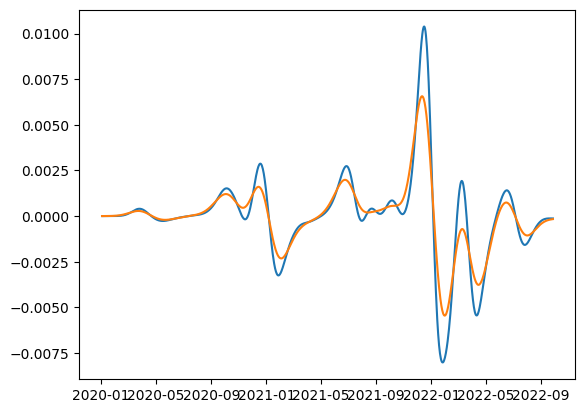

In [12]:
plt.plot(example.df["Date_reported"],example.df["FirstDerivate"])
plt.plot(example.df["Date_reported"],example.df["FirstDerivateSmoothed"])

In [13]:
# A simplier version with a kernels as a number an without customize the attributes with default values
def kernelPlot(k):
    example = ek.curves(databaseCOLOMBIA,datesName,casesName,k,k,plotNameW,dfNameW)
    example.run()
    #return 
    plt.plot(example.df["Date_reported"],example.df["FirstDerivate"])
    plt.plot(example.df["Date_reported"],example.df["FirstDerivateSmoothed"])

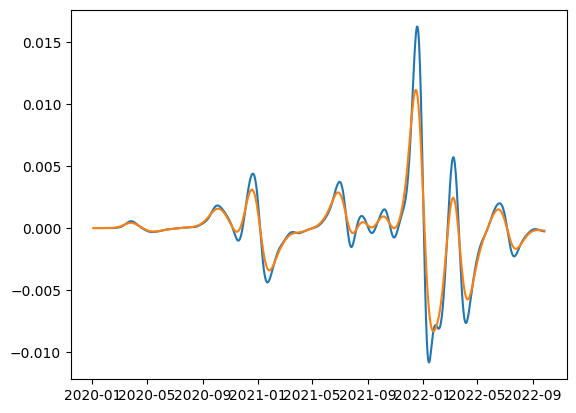

In [14]:
kernelPlot(20)